In [1]:
import matplotlib
from matplotlib import pyplot
import numpy as np

import sys
sys.path.append("..")
from hiora_cartpole import features
from hiora_cartpole import fourier_fa
from hiora_cartpole import driver

import gym

env = gym.make('MountainCar-v0')

state_ranges = np.array([env.observation_space.low, env.observation_space.high])
four_n_weights, four_feature_vec \
    = fourier_fa.make_feature_vec(state_ranges,
                                  n_acts=3,
                                  order=7)

#fv = feature_vec(cartpole.observation_space.sample(), cartpole.action_space.sample())

from hiora_cartpole import linfa
experience = linfa.init(lmbda=0.9,
                        init_alpha=1.0,
                        epsi=0.01,
                        feature_vec=four_feature_vec,
                        n_weights=four_n_weights,
                        act_space=env.action_space,
                        theta=None,
                        is_use_alpha_bounds=True)

/home/erle/.local/lib/python2.7/site-packages/matplotlib/__init__.py:1350: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)
[2016-09-20 10:10:04,312] Making new env: MountainCar-v0


<IPython.core.display.Javascript object>


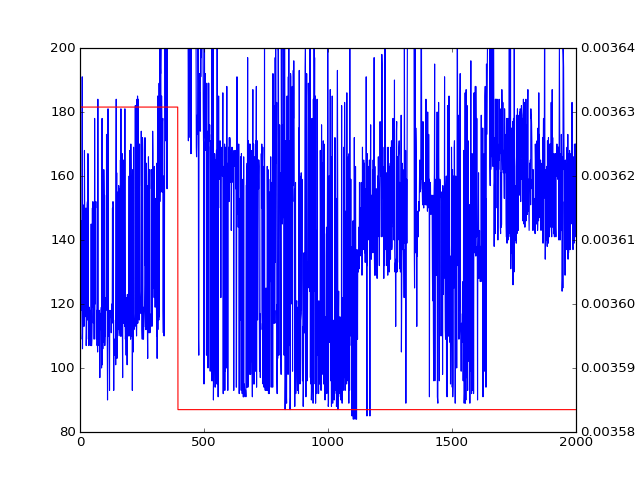

In [75]:
experience, steps_per_episode, alpha_per_episode \
    = driver.train(env, linfa, experience, n_episodes=2000, max_steps=200, is_render=False)
# Credits: http://matplotlib.org/examples/api/two_scales.html
fig, ax1 = pyplot.subplots()
ax1.plot(steps_per_episode, color='b')
ax2 = ax1.twinx()
ax2.plot(alpha_per_episode, color='r')
pyplot.show()

In [59]:
steps_per_episode

array([143, 129, 132, 148, 149, 147, 142, 148, 136, 147, 151, 153, 147,
       148, 148, 134, 151, 152, 142, 100, 145, 134, 143, 149, 132, 147,
       147, 148, 131, 147, 149,  99, 150, 133, 145, 150, 145, 140,  98,
       148, 100,  95, 142, 145, 136, 144, 129, 109, 109, 143, 141, 146,
       145, 140, 146, 144, 143, 142, 147, 131, 146,  92, 147, 144, 140,
       145, 146, 130, 140, 131, 146, 146, 121, 144, 141, 129, 145, 150,
       109, 142, 159, 143, 144,  92,  92, 132, 148, 101,  93, 141, 102,
       146, 146,  97, 128, 109, 143, 143, 124, 109, 142, 144, 142, 152,
       142, 125, 106, 137, 147, 124, 124, 143, 149, 116, 122, 110, 144,
       149, 148, 141, 147, 127, 151, 102, 130,  93, 111, 119, 147,  99,
       129, 141,  97, 113, 150, 110, 140, 150, 140, 153,  99, 130, 148,
       147, 144, 134, 127, 140, 124, 146, 148, 197, 150, 137, 117, 132,
        93, 130,  98, 147, 148, 148, 113, 130, 112, 167, 110, 147,  93,
       117, 148, 132,  94, 145, 146, 138, 146, 123, 146, 149, 11

(40, 40) (40, 40) (40, 40)


<IPython.core.display.Javascript object>


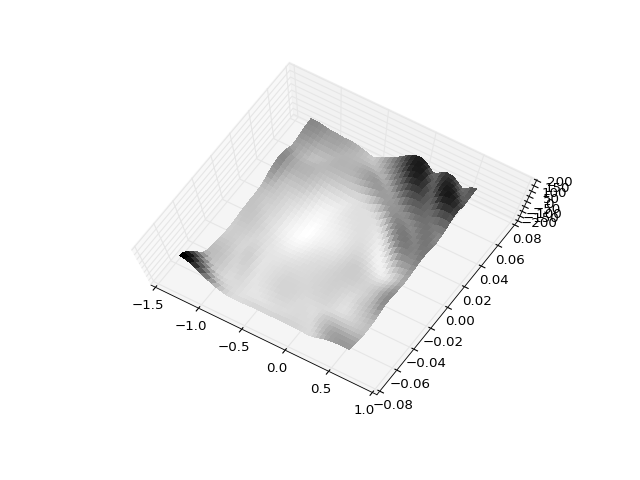

In [66]:
%matplotlib notebook
state_ranges = np.array([env.observation_space.low, env.observation_space.high])
driver.plot_2D_V(state_ranges, env.action_space, four_feature_vec, experience.theta)

In [69]:
experience, steps_per_episode = driver.train(env, linfa, experience, n_episodes=10, max_steps=200, is_render=True)
#pyplot.plot(steps_per_episode)
#pyplot.show()

In [6]:
from hiora_cartpole import features

env = gym.make('MountainCar-v0')

state_ranges = np.array([env.observation_space.low, env.observation_space.high])

tilec_n_weights, tilec_feature_vec = features.make_feature_vec(state_ranges, 3, [9, 9], 5)

#fv = feature_vec(cartpole.observation_space.sample(), cartpole.action_space.sample())

from hiora_cartpole import linfa
fexperience = linfa.init(lmbda=0.9,
                        init_alpha=1.0,
                        epsi=0.01,
                        feature_vec=tilec_feature_vec,
                        n_weights=tilec_n_weights,
                        act_space=env.action_space,
                        theta=None,
                        is_use_alpha_bounds=True)

[2016-09-20 10:13:46,516] Making new env: MountainCar-v0


In [7]:
fexperience, steps_per_episode, alpha_per_episode \
    = driver.train(env, linfa, fexperience, n_episodes=100, max_steps=200, is_render=True)
# Credits: http://matplotlib.org/examples/api/two_scales.html
fig, ax1 = pyplot.subplots()
ax1.plot(steps_per_episode, color='b')
ax2 = ax1.twinx()
ax2.plot(alpha_per_episode, color='r')
pyplot.show()

KeyboardInterrupt: 

(40, 40) (40, 40) (40, 40)


<IPython.core.display.Javascript object>


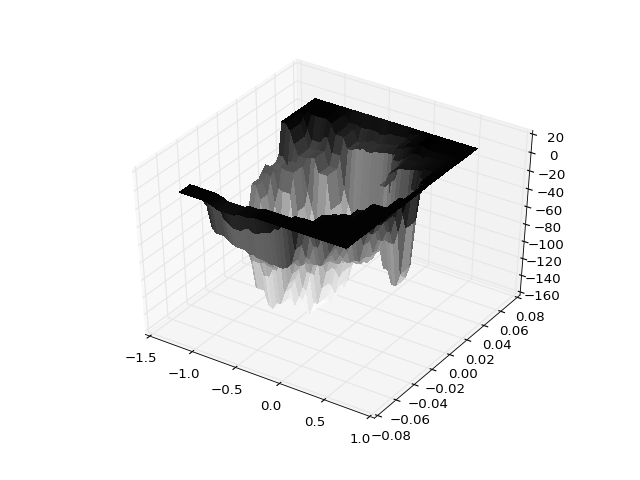

In [103]:
%matplotlib notebook
driver.plot_2D_V(state_ranges, env.action_space, tilec_feature_vec, fexperience.theta)

Gehring's tilecoding is incredibly slow!

In [4]:
%time driver.train(env, linfa, fexperience, n_episodes=100, max_steps=200, is_render=False)

CPU times: user 1min 34s, sys: 76 ms, total: 1min 34s
Wall time: 1min 34s


(Immutable(feature_vec=<function feature_vec_inner at 0x7fbe17f9aa28>, theta=array([ 0.,  0.,  0., ...,  0.,  0.,  0.]), E=array([ 0.,  0.,  0., ...,  0.,  0.,  0.]), epsi=0.01, init_alpha=1.0, p_alpha=0.024050127792627128, lmbda=0.9, p_obs=None, p_act=None, p_feat=None, act_space=Discrete(3), is_use_alpha_bounds=True),
 array([200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200,
        200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200,
        200, 200, 200, 164, 200, 200, 200, 200, 200, 200, 200, 200, 200,
        200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200,
        200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200,
        200, 180, 162, 152, 185, 177, 149, 154, 158, 200, 162, 159, 164,
        157, 151, 155, 162, 160, 156, 158, 156, 154, 158, 154, 160, 150,
        149, 153, 153, 153, 154, 154, 158, 158, 153], dtype=int32),
 array([ 0.04718258,  0.04718258,  0.03039294,  0.03039294,  0.03039294,
         0.03039294,  0.03

In [74]:
from hiora_cartpole import easytile_fa

env = gym.make('MountainCar-v0')

state_ranges = np.array([env.observation_space.low, env.observation_space.high])

easyt_n_weights, easyt_feature_vec = easytile_fa.make_feature_vec(state_ranges, 3, [9, 9], 5)

#fv = feature_vec(cartpole.observation_space.sample(), cartpole.action_space.sample())

from hiora_cartpole import linfa
eexperience = linfa.init(lmbda=0.9,
                        init_alpha=1.0,
                        epsi=0.01,
                        feature_vec=easyt_feature_vec,
                        n_weights=easyt_n_weights,
                        act_space=env.action_space,
                        theta=None,
                        is_use_alpha_bounds=True)

[2016-09-20 12:07:52,017] Making new env: MountainCar-v0


It's quite sensitive to lambda.

0.0 -1.0 0.0 1.0
-5.0 -1.0 0.0 -4.0
0.0 -1.0 3.44444444444 -2.44444444444
5.88888888889 -1.0 5.88888888889 1.0
4.40409356725 -1.0 4.40409356725 1.0
2.48298245614 -1.0 2.48298245614 1.0
0.169187134503 -1.0 0.169187134503 1.0
-2.49802397661 -1.0 0.0 -1.49802397661
0.0 -1.0 0.0 1.0
-0.243614979291 -1.0 -0.243614979291 1.0
-0.706483439943 -1.0 -0.410993544132 0.704510104189
-0.484874293227 -1.0 -0.484874293227 1.0
-0.822870706922 -1.0 -0.822870706922 1.0
-1.37068245854 -1.0 -1.37068245854 1.0
-2.10732801428 -1.0 -2.10732801428 1.0
-3.01392399375 -1.0 -2.411139195 0.397215201251
-2.74783512061 -1.0 -2.69585860717 0.94802348656
-2.96195403954 -1.0 -1.48097701977 -0.480977019769
-1.30305257068 -1.0 -1.30305257068 1.0
-1.87959822566 -1.0 -1.87959822566 1.0
-2.64210429443 -1.0 -1.47905983634 -0.163044458093
-1.43780966557 -1.0 -1.43780966557 1.0
-1.9091242191 -1.0 -1.52832849304 0.619204273938
-1.56003785672 -1.0 -1.56003785672 1.0
-1.84974170929 -1.0 -3.45586843929 2.60612673
-4.87836650735 -1

<IPython.core.display.Javascript object>


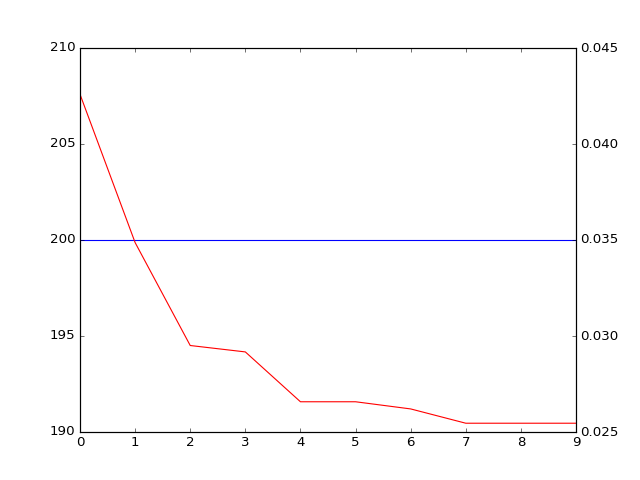

In [75]:
eexperience, steps_per_episode, alpha_per_episode \
    = driver.train(env, linfa, eexperience, n_episodes=10, max_steps=200, is_render=False)
# Credits: http://matplotlib.org/examples/api/two_scales.html
fig, ax1 = pyplot.subplots()
ax1.plot(steps_per_episode, color='b')
ax2 = ax1.twinx()
ax2.plot(alpha_per_episode, color='r')
pyplot.show()

(40, 40) (40, 40) (40, 40)


<IPython.core.display.Javascript object>


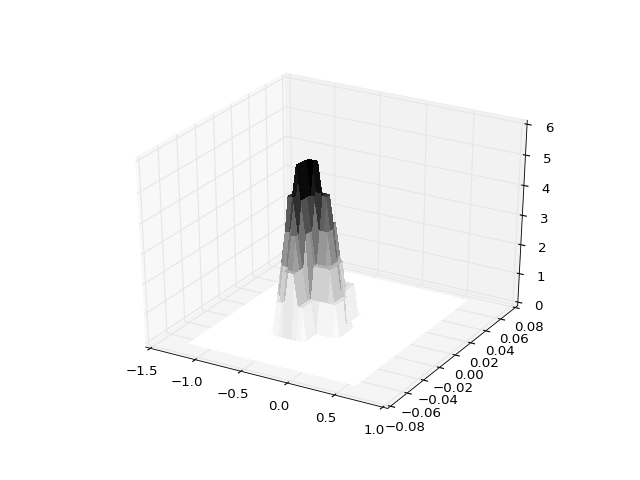

In [70]:
%matplotlib notebook
driver.plot_2D_V(state_ranges, env.action_space, easyt_feature_vec, eexperience.theta)

In [53]:
eexperience, steps_per_episode, alpha_per_episode \
    = driver.train(env, linfa, eexperience, n_episodes=20, max_steps=200, is_render=True)

In [28]:
%time driver.train(env, linfa, fexperience, n_episodes=100, max_steps=200, is_render=False)

CPU times: user 4.4 s, sys: 4 ms, total: 4.4 s
Wall time: 4.4 s


(Immutable(feature_vec=<function feature_vec_inner at 0x7fbe1057aed8>, theta=array([ 0.       , -1.6374056, -7.3466172, ...,  0.       ,  0.       ,  0.       ]), E=array([ 0.,  0.,  0., ...,  0.,  0.,  0.]), epsi=0.01, init_alpha=1.0, p_alpha=0.024309124525753373, lmbda=0.9, p_obs=None, p_act=None, p_feat=None, act_space=Discrete(3), is_use_alpha_bounds=True),
 array([200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200,
        200, 200, 200, 200, 200, 161, 200, 200, 200, 151, 174, 200, 169,
        171, 200, 138, 188, 141,  88,  88, 135, 140, 141,  92, 158, 150,
         88,  90,  86, 139, 144, 161, 122, 161, 152, 136, 135, 148, 139,
        100, 141, 140, 173, 200, 154, 152, 145, 138, 139, 135, 132, 134,
        134, 134, 136, 138, 134, 134, 119, 116, 110, 109, 187, 135, 117,
        120, 113, 116,  89, 136, 103, 104, 106, 109, 128, 138,  86, 137,
        144, 140, 136,  88, 130,  84,  83, 168, 129], dtype=int32),
 array([ 0.04487296,  0.03067321,  0.03067321,  0.0306732

Faster.

In [9]:
# What do I want?
#
#  - Write one procedure that just trains for a number of episodes.
#
#  - Write another procedure that keeps a running average of episode lengths and
#    stops training when the average doesn't change much anymore.
#
#  - Possibly write a procedure that returns the sequence of Q functions
#    resulting from training.


next_dtimestep = driver.make_next_dtimestep(env, linfa.think)
train_and_prep = driver.make_train_and_prep(env, next_dtimestep, linfa.wrapup)

episode_nr, last_avg, experience \
    = driver.train_until_converged(
          env=env,
          train_and_prep=train_and_prep,
          init_experience=experience,
          max_steps=100,
          max_episodes=10000,
          avg_window=200,
          max_diff=1)
print episode_nr, last_avg




cnts_dtimesteps = driver.cnts_dtimesteps_iter(env, train_and_prep, experience,
                                              100)

thetas = driver.train_return_thetas(cnts_dtimesteps, 1000)

sqes = 1.0 / experience.theta.shape[0] * np.sum(np.diff(thetas, axis=0) ** 2, axis=1)

pyplot.plot(sqes)
pyplot.show()

sums = np.sum(np.abs(thetas), axis=1)
pyplot.plot(sums)
pyplot.show()

with np.load("hard-earned-theta.npz") as data:
    old_theta = data['arr_0']
    print np.sum(old_theta)

#hard_earned_theta = np.copy(experience.theta)
#np.savez_compressed("hard-earned-theta", hard_earned_theta)

KeyboardInterrupt: 

In [11]:
np.array([[1, 2], [3, 4]])[0]

array([1, 2])

In [4]:
env.close()